In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in CSV format)
df = pd.read_csv('Bookings.csv')


In [2]:
# Check for missing values
df.isnull().sum()

# Remove duplicates
df = df.drop_duplicates()

# Data types of columns
df.dtypes


Date                           object
Time                           object
Booking_ID                     object
Booking_Status                 object
Customer_ID                    object
Vehicle_Type                   object
Pickup_Location                object
Drop_Location                  object
V_TAT                         float64
C_TAT                         float64
Canceled_Rides_by_Customer     object
Canceled_Rides_by_Driver       object
Incomplete_Rides               object
Incomplete_Rides_Reason        object
Booking_Value                   int64
Payment_Method                 object
Ride_Distance                   int64
Driver_Ratings                float64
Customer_Rating               float64
Vehicle Images                 object
dtype: object

In [3]:
# Descriptive statistics for numeric columns
df.describe()

# Check for unique values in categorical columns
df.nunique()


Date                           40214
Time                            1440
Booking_ID                    103024
Booking_Status                     4
Customer_ID                    94544
Vehicle_Type                       7
Pickup_Location                   50
Drop_Location                     50
V_TAT                             40
C_TAT                             25
Canceled_Rides_by_Customer         5
Canceled_Rides_by_Driver           4
Incomplete_Rides                   2
Incomplete_Rides_Reason            3
Booking_Value                   2883
Payment_Method                     4
Ride_Distance                     50
Driver_Ratings                    21
Customer_Rating                   21
Vehicle Images                     1
dtype: int64

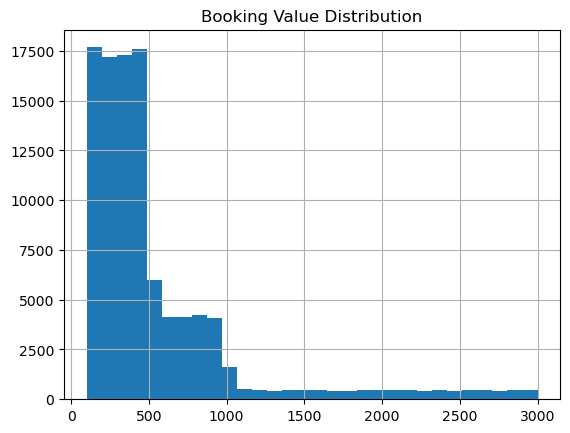

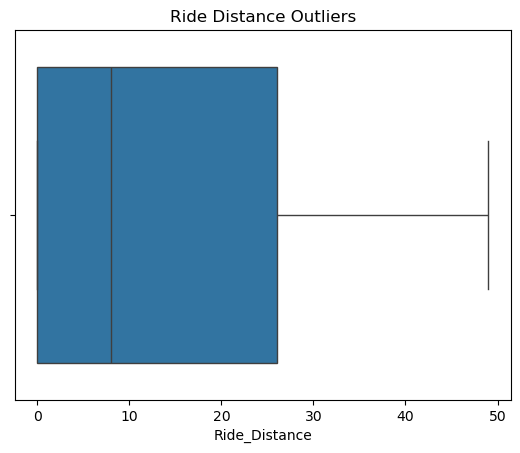

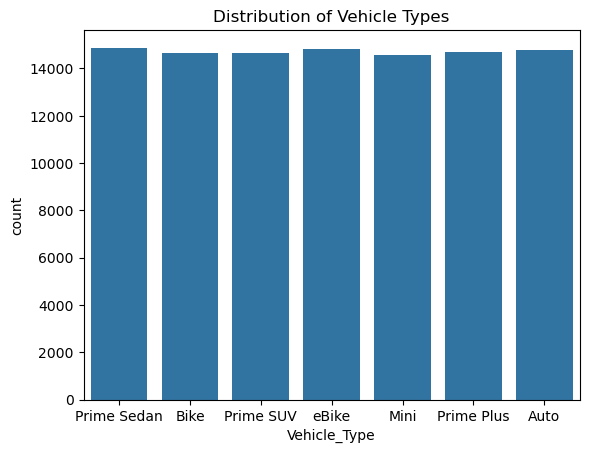

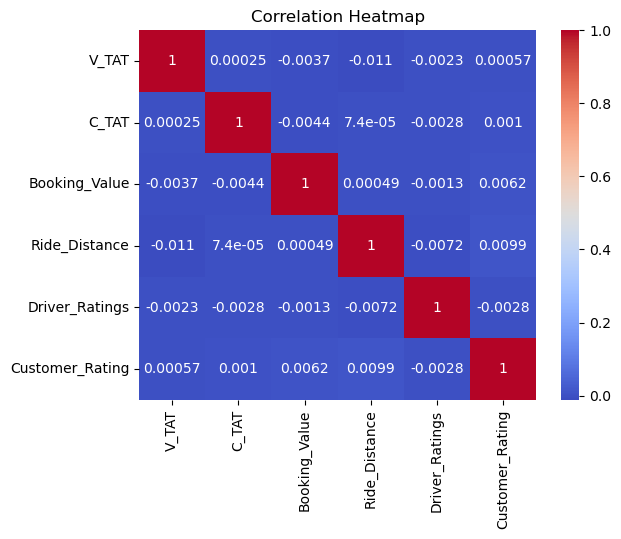

In [4]:
# Plot histograms for numerical columns
df['Booking_Value'].hist(bins=30)
plt.title('Booking Value Distribution')
plt.show()

# Boxplot for Ride Distance and Booking Value
sns.boxplot(x=df['Ride_Distance'])
plt.title('Ride Distance Outliers')
plt.show()

# Countplot for categorical columns
sns.countplot(x='Vehicle_Type', data=df)
plt.title('Distribution of Vehicle Types')
plt.show()

# Select numeric columns only
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


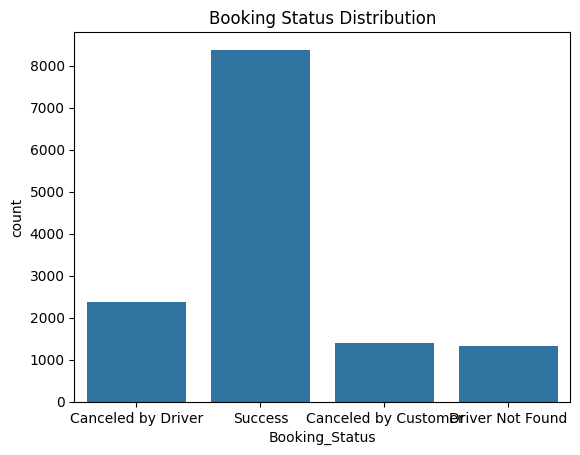

In [5]:
sns.countplot(x='Booking_Status', data=df)
plt.title('Booking Status Distribution')
plt.show()


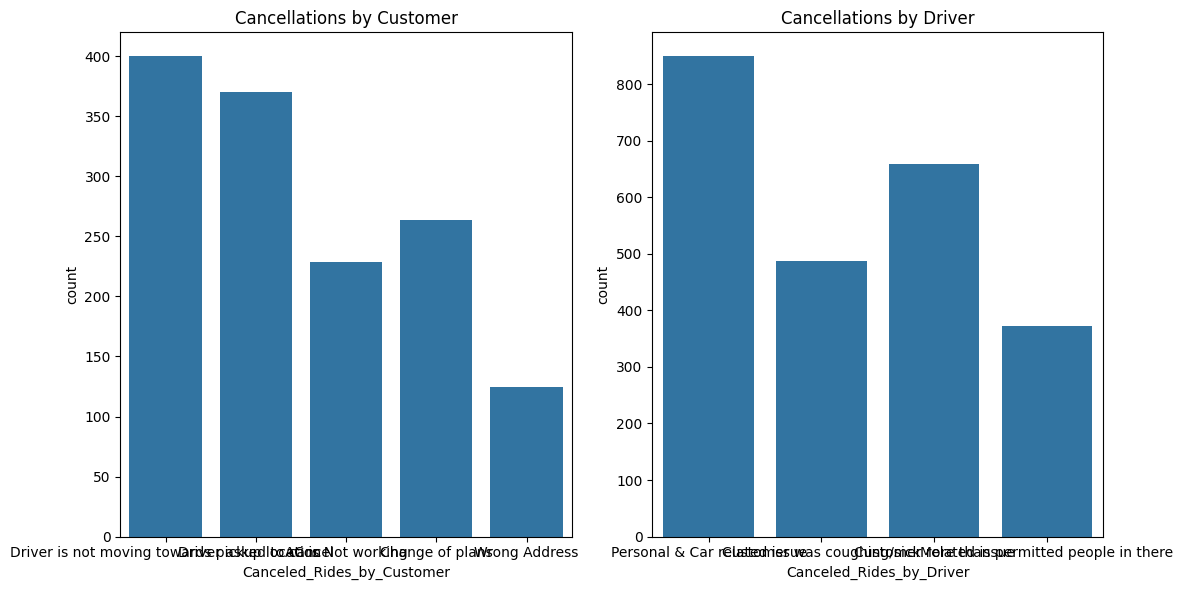

In [6]:
# Cancellations by customer and driver
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Canceled_Rides_by_Customer', data=df, ax=axes[0])
sns.countplot(x='Canceled_Rides_by_Driver', data=df, ax=axes[1])
axes[0].set_title('Cancellations by Customer')
axes[1].set_title('Cancellations by Driver')
plt.tight_layout()
plt.show()


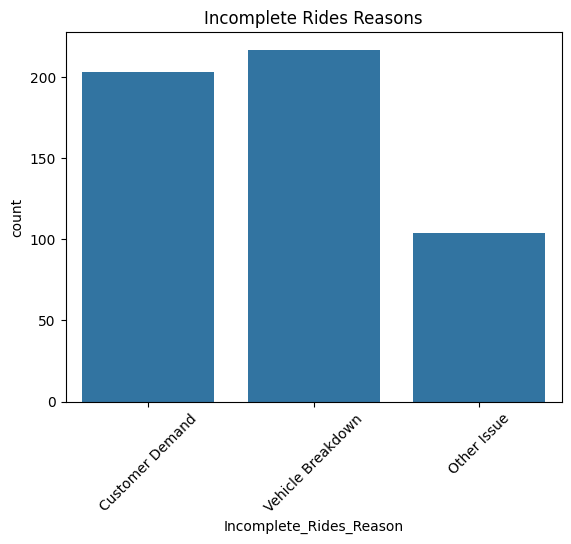

In [7]:
sns.countplot(x='Incomplete_Rides_Reason', data=df)
plt.title('Incomplete Rides Reasons')
plt.xticks(rotation=45)
plt.show()


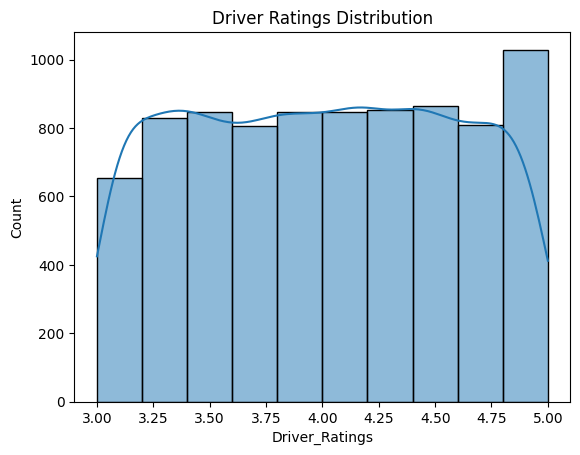

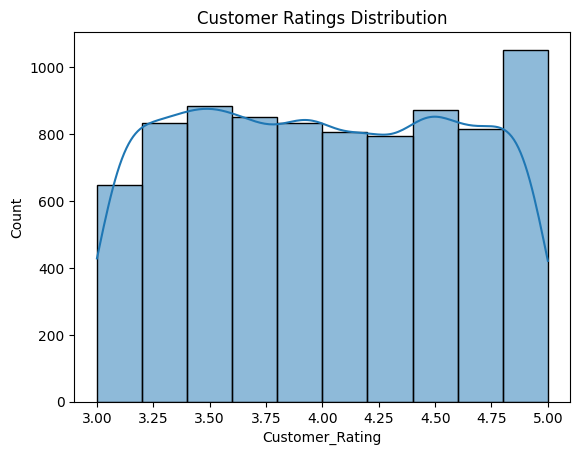

In [8]:
# Distribution of driver ratings
sns.histplot(df['Driver_Ratings'], bins=10, kde=True)
plt.title('Driver Ratings Distribution')
plt.show()

# Distribution of customer ratings
sns.histplot(df['Customer_Rating'], bins=10, kde=True)
plt.title('Customer Ratings Distribution')
plt.show()


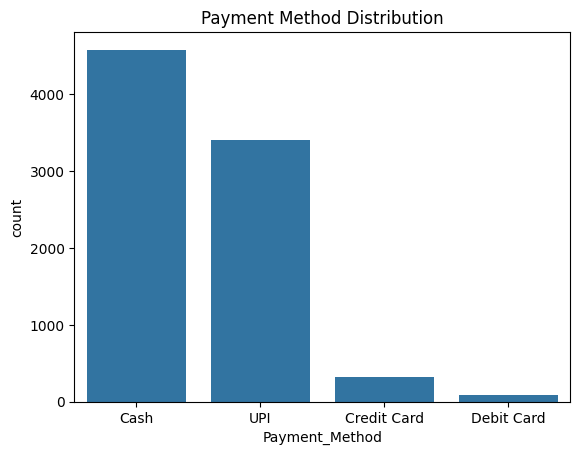

In [9]:
sns.countplot(x='Payment_Method', data=df)
plt.title('Payment Method Distribution')
plt.show()


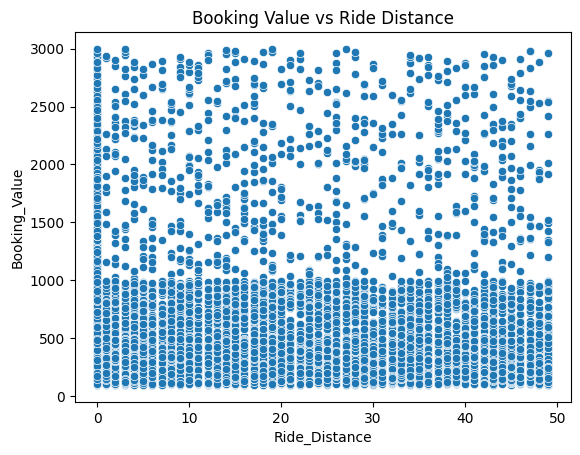

In [10]:
sns.scatterplot(x='Ride_Distance', y='Booking_Value', data=df)
plt.title('Booking Value vs Ride Distance')
plt.show()


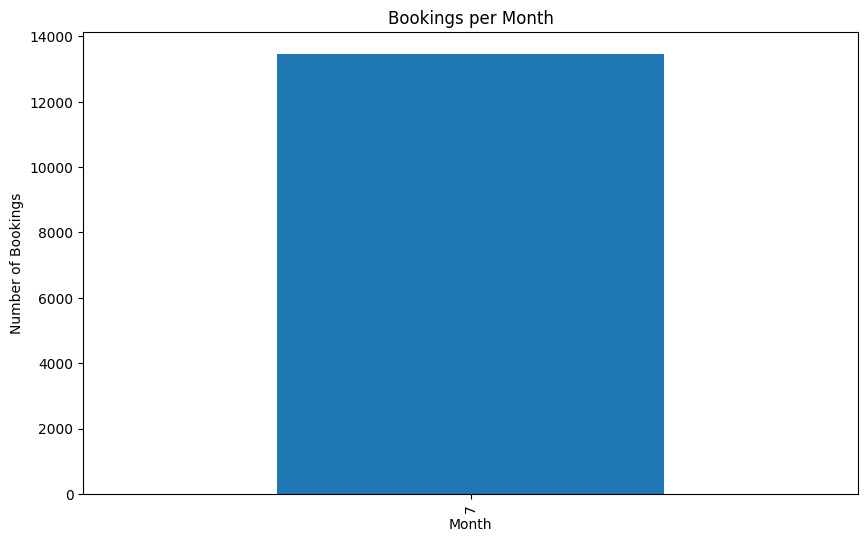

In [11]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is datetime type

# Extract year, month, and weekday
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

# Plot booking trends over time (Yearly or Monthly)
df.groupby('Month')['Booking_ID'].count().plot(kind='bar', figsize=(10, 6))
plt.title('Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()
